MLP

In [1]:
import os
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import StratifiedShuffleSplit

import utils
import metrics
import data_tools

To estimate quality of model I will use:<br>
mean_average_error (mae)<br>
weighted_mae<br>
balanced_accuracy<br>
confusion matrix<br>

In [2]:
seed = 1528
path2data = os.path.join('..', 'data', 'winequality-white.csv')
data =  data_tools.Data(path2data, seed)
data.scale()
x_train, y_train, x_test, y_test = data.get_train_test()
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
weighted_mae_scorer = make_scorer(metrics.weighted_mae, greater_is_better=False, class_weights=data.class_weights)
balanced_accuracy_scorer = make_scorer(metrics.balanced_accuracy_score, greater_is_better=True)

I will choose parameters of MLPRegressor (hidden_layer_sizes, activation, alpha, learning_rate_init) using GridSearchCV with StratifiedShuffleSplit

In [3]:
model = GridSearchCV(MLPRegressor(batch_size=400, early_stopping=True, shuffle=True, max_iter=200, n_iter_no_change=50),
                     param_grid={'hidden_layer_sizes': [(20,), (40,), (20, 40), (20, 40, 60)],
                                 'activation': ['tanh', 'relu'],
                                 'alpha': [0.1, 0.01, 0.001],
                                 'learning_rate_init': [0.1, 0.01, 0.001]},
                     scoring=balanced_accuracy_scorer,
                     cv=StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=seed),
                     n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
print("Best: %f using %s" % (model.best_score_, model.best_params_))
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
params = model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.254830 using {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.1}
0.243625 (0.010382) with: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.1}
0.236055 (0.005513) with: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01}
0.220623 (0.011964) with: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.001}
0.247410 (0.009801) with: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.1}
0.245841 (0.015747) with: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.01}
0.221772 (0.008523) with: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.001}
0.241640 (0.004512) with: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (20, 40), 'learning_rate_init': 0.1}
0.246397 (0.016413) with: {'activation': 'ta


Train
MAE: 0.537581
Weighted MAE: 1.2152
Balanced accuracy score: 0.2750

Test
MAE: 0.577025
Weighted MAE: 1.2710
Balanced accuracy score: 0.2425
Confusion matrix:
 [[  0   0   3   3   0   0   0]
 [  0   7  27  11   1   0   0]
 [  0   9 206 133   5   0   0]
 [  0   0 125 379  33   0   0]
 [  0   0  11 143  53   0   0]
 [  0   0   0  27  12   0   0]
 [  0   0   0   0   1   0   0]]


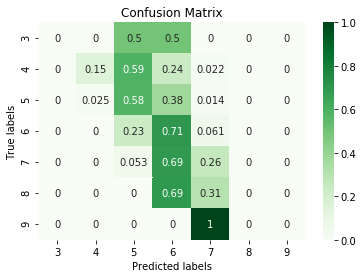

In [4]:
utils.print_metrics("Train", y_train, y_pred_train, data.classes, data.class_weights, draw_conf_matrix=False)
utils.print_metrics("Test", y_test, y_pred, data.classes, data.class_weights, draw_conf_matrix=True)

Save best model

In [5]:
from joblib import dump
dump(model, os.path.join('..', 'models', 'mlp.joblib')) 

['..\\models\\mlp.joblib']